In [1]:
import boxball_loader as bbl

In [2]:
ev = bbl.load_event_data(1800, 3000, ['bat_id', 'pit_id', 'event_id'], True)
ev.columns

Index(['game_id', 'date', 'game_type', 'ab_fl', 'bat_event_fl', 'pit_id',
       'tb_ct', 'bat_id', 'event_cd', 'event_id', 'h_fl', 'ob_fl', 'yr'],
      dtype='object')

In [3]:
ev['matchup_ct'] = ev.sort_values(['bat_id', 'pit_id', 'date', 'event_id']).groupby(['bat_id', 'pit_id']).cumcount()

<AxesSubplot:xlabel='yr'>

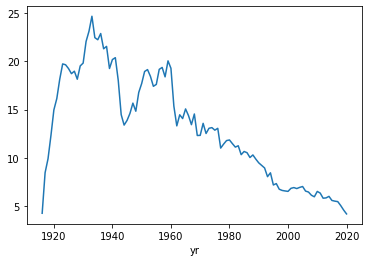

In [4]:
ev.groupby('yr')['matchup_ct'].mean().plot()

<AxesSubplot:xlabel='yr'>

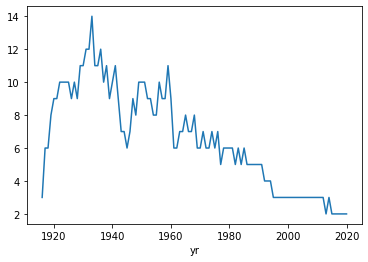

In [5]:
ev.groupby('yr')['matchup_ct'].median().plot()

In [6]:
ev['first'] = (ev['matchup_ct']==0)
ev.sample(10)

,game_id,date,game_type,ab_fl,bat_event_fl,pit_id,tb_ct,bat_id,event_cd,event_id,h_fl,ob_fl,yr,matchup_ct,first
735676,SLN192606230,1926-06-23,RS,True,True,songd101,0,ofarb101,2,16,0,0,1926,3,False
12445503,COL201105150,2011-05-15,RS,True,True,gregl001,0,tulot001,2,71,0,0,2011,7,False
8915922,TOR199207110,1992-07-11,RS,True,True,moorm001,0,belld001,3,16,0,0,1992,3,False
12086434,SFN200906170,2009-06-17,RS,True,True,romos001,0,huntt001,2,73,0,0,2009,0,True
11851616,CIN200805060,2008-05-06,RS,False,True,zambc001,0,dunna001,14,15,0,1,2008,66,False
4075000,BOS196007090,1960-07-09,RS,True,True,shanb102,0,buddd101,2,72,0,0,1960,25,False
8177814,LAN198805010,1988-05-01,RS,True,True,haveb001,0,pagnt001,3,58,0,0,1988,0,True
12323250,HOU201007270,2010-07-27,RS,True,True,myerb001,0,colvt001,3,1,0,0,2010,7,False
4614159,NYN196409271,1964-09-27,RS,True,True,stalt101,0,keoum101,2,10,0,0,1964,21,False
2469537,PHA194405160,1944-05-16,RS,True,True,florj101,0,hoovj101,2,18,0,0,1944,16,False


In [7]:
ev['matchup_ct'].value_counts()

0      2085496
1      1530822
2      1177849
3       898557
4       743466
        ...   
307          1
306          1
305          1
304          1
379          1
Name: matchup_ct, Length: 380, dtype: int64

<AxesSubplot:xlabel='yr'>

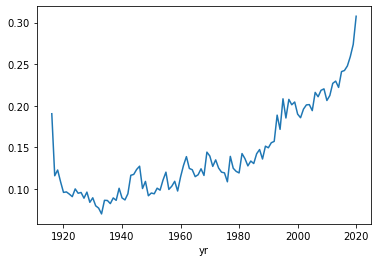

In [8]:
df = ev.groupby('yr')['first'].agg(func=[sum, len])
(df['sum']/df['len']).plot()

In [9]:
pit_faced = ev.groupby(['bat_id', 'pit_id', 'yr'])['bat_event_fl'].sum().reset_index().groupby(['bat_id', 'yr'])['pit_id'].nunique().rename('pitcher_ct')
pit_faced.sort_values()

bat_id    yr  
laket001  2005      1
duenb001  2012      1
loupa001  2012      1
lougl101  1967      1
fossc001  2006      1
                 ... 
castn001  2019    267
bogax001  2019    268
mccua001  2018    271
dever001  2019    275
machm001  2018    276
Name: pitcher_ct, Length: 70867, dtype: int64

<AxesSubplot:xlabel='yr'>

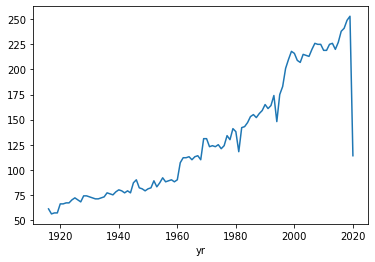

In [10]:
pit_faced.sort_values(ascending=False).groupby('yr').nth(10).plot()

In [21]:
h2h = ev.groupby('bat_id').agg(pitcher_ct=('pit_id', lambda x: x.nunique()), yr_last=('yr', max)).sort_values(by='pitcher_ct', ascending=False)
h2h.head(20)

,pitcher_ct,yr_last
bat_id,,
pujoa001,1604,2020
belta001,1555,2018
beltc001,1493,2017
vizqo001,1477,2012
rodra001,1454,2016
cabrm001,1402,2020
ortid001,1390,2016
rodri001,1368,2011
jeted001,1362,2014


In [24]:
h2h.query('pitcher_ct>=1000')['yr_last'].min()

1997

In [33]:
h2h.query('bat_id=="robif103"')

,pitcher_ct,yr_last
bat_id,,
robif103,711,1976
